In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/ts.csv", header=None)
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df.columns = ['month', 'passengers']

In [4]:
df.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

In [6]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
print('Time period start: {}\nTime period end: {}'.format(df.month.min(), df.month.max()))

Time period start: 1949-01-01 00:00:00
Time period end: 1960-12-01 00:00:00


In [12]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

In [13]:
df.head()

,month,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
y = df.set_index('month')

In [15]:
y.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
y.columns

Index(['passengers'], dtype='object')

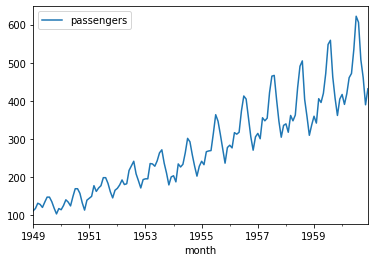

In [17]:
y.plot()

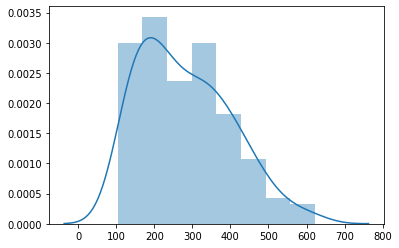

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y)
plt.show()

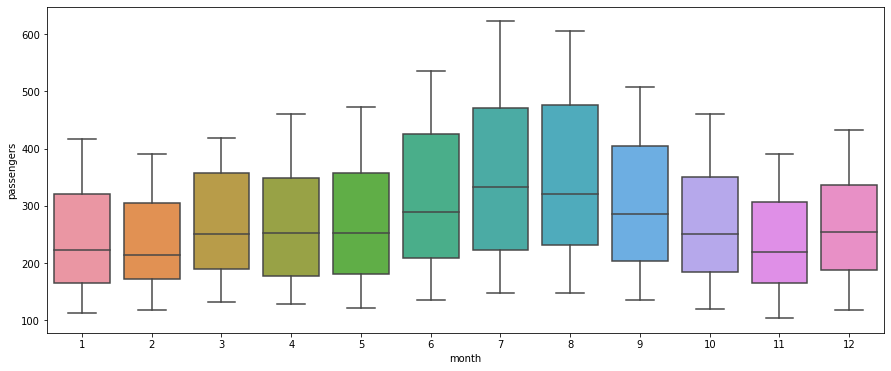

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
# sns.boxplot(y.passengers.index, y.passengers)
sns.boxplot(y.passengers.index.month, y.passengers)

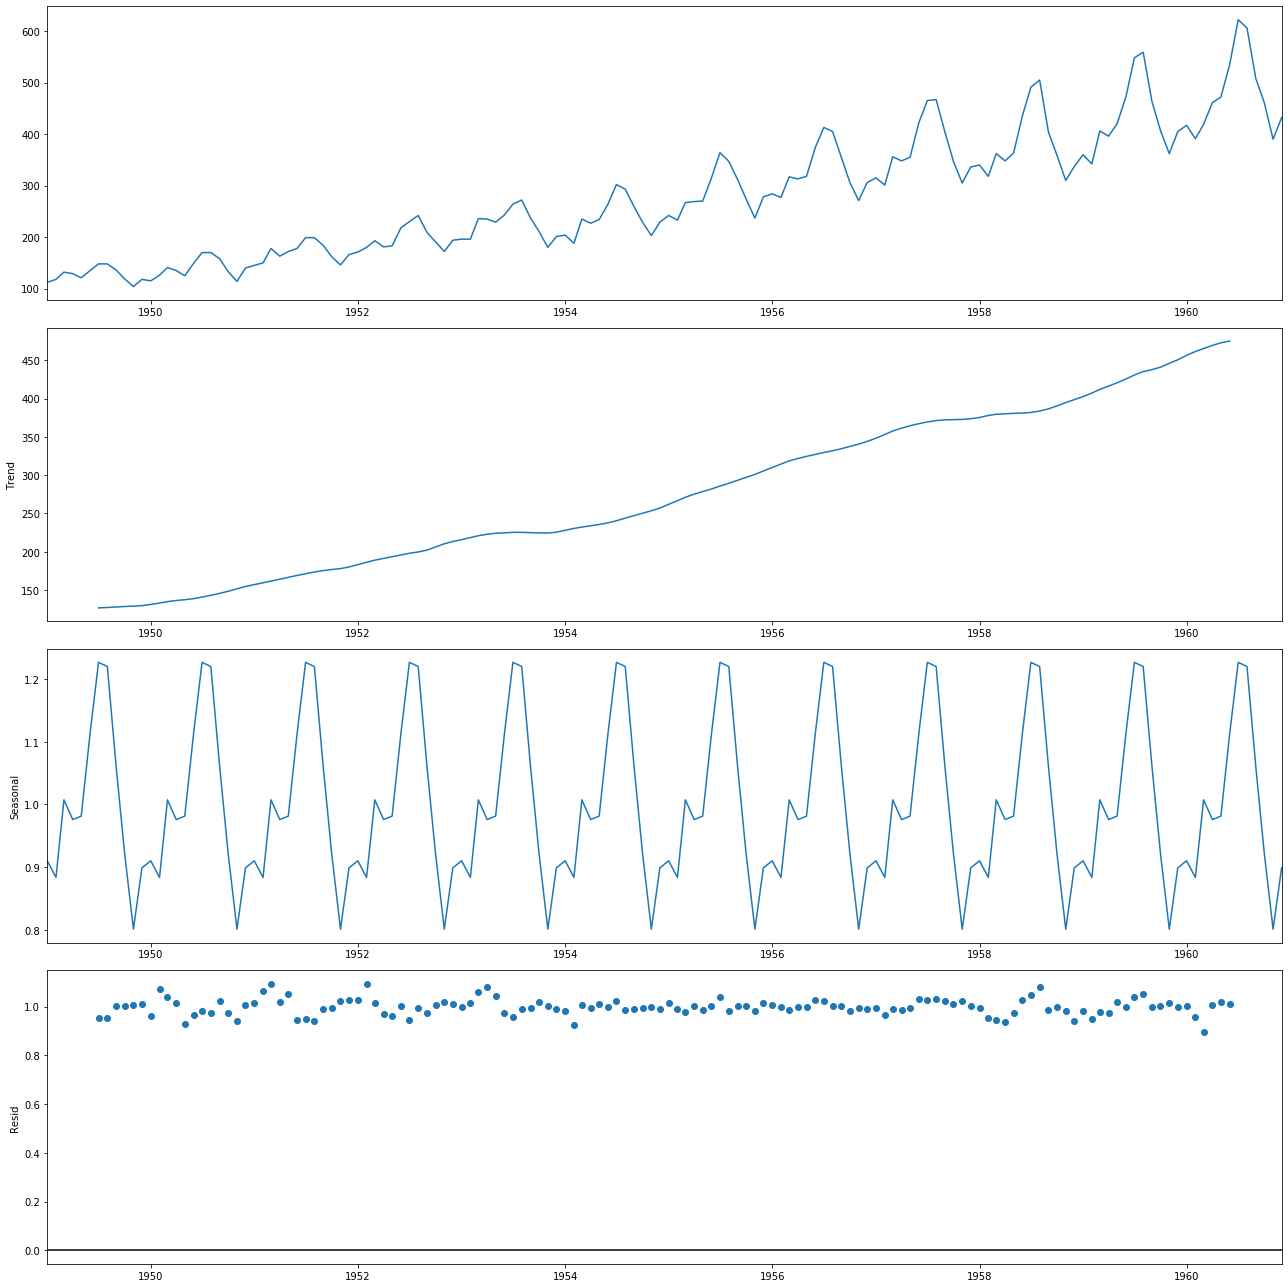

In [23]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 18
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

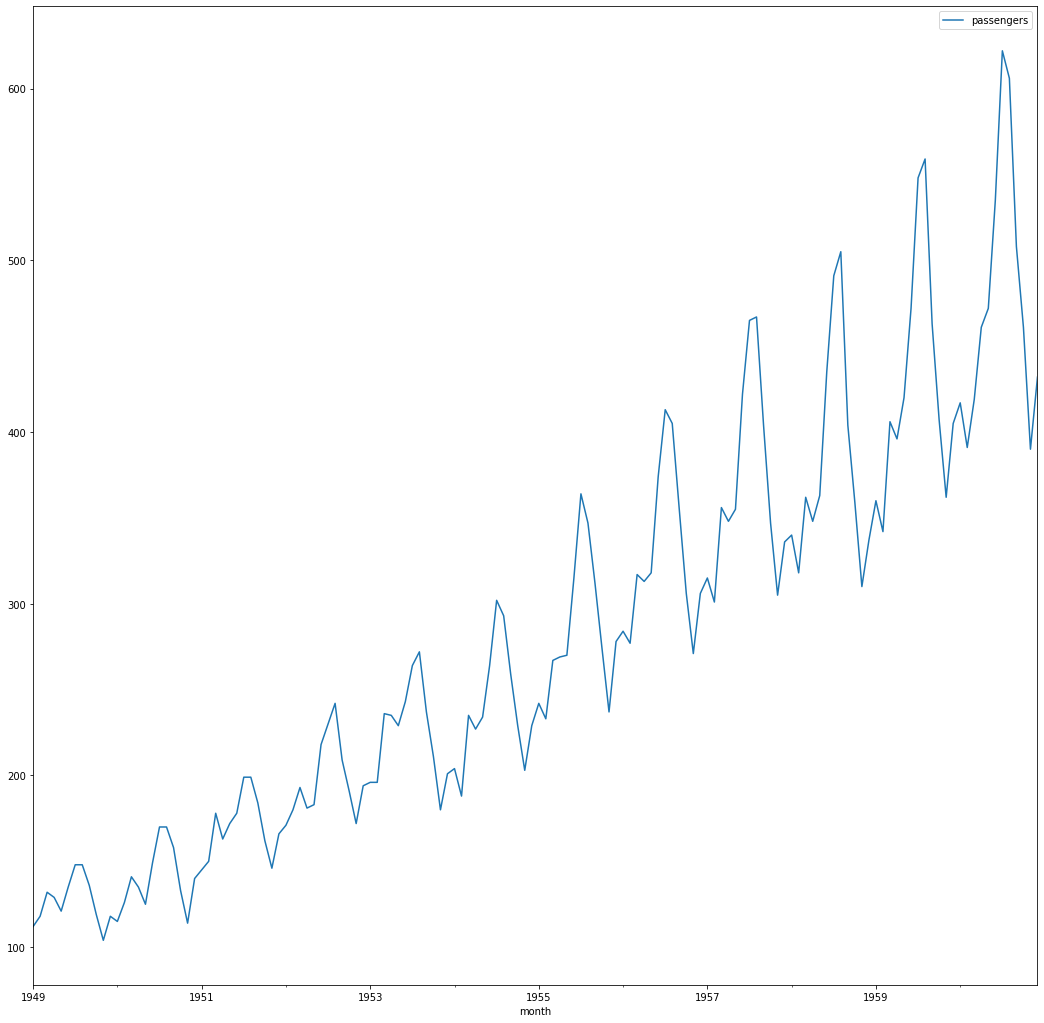

In [24]:
y.plot()

In [34]:
# rollingMean = y.rolling(window=2).mean()
# rollingStd = y.rolling(window=2).std()
rollingMean = y.rolling(window=12).mean()
rollingStd = y.rolling(window=12).std()
# rollingMean = y.rolling(window=28).mean()
# rollingStd = y.rolling(window=28).std()

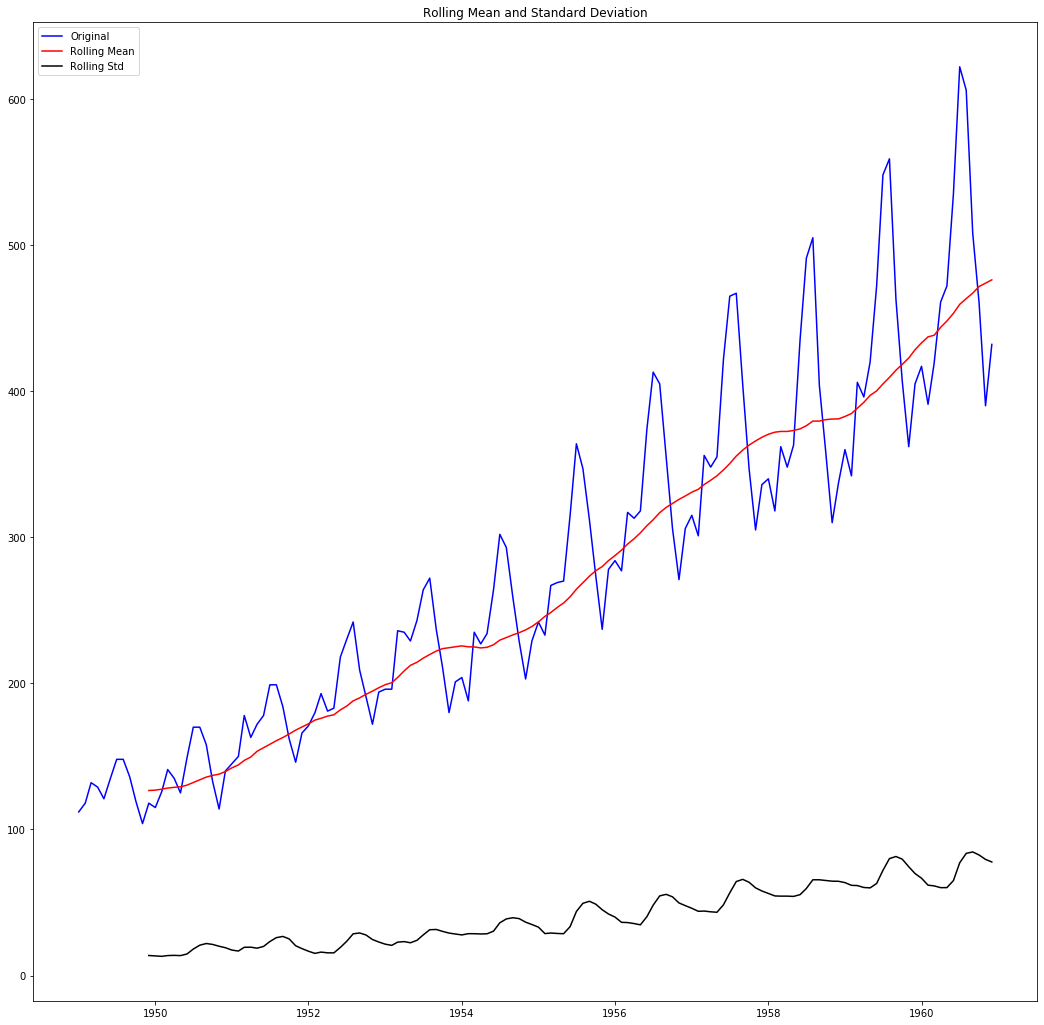

In [35]:
# Plot Rolling statistics:
plt.plot(y, color="blue", label="Original")
plt.plot(rollingMean, color="red", label="Rolling Mean")
plt.plot(rollingStd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show()

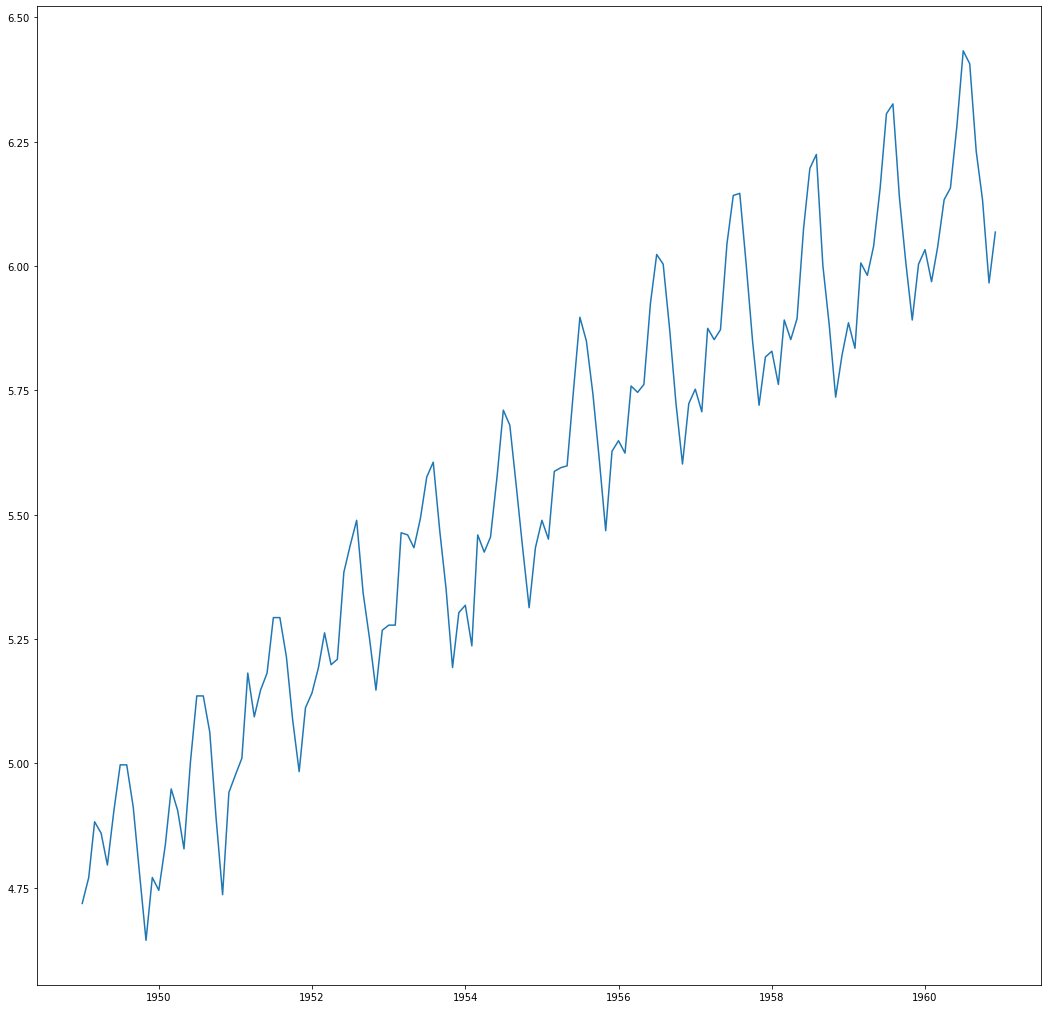

In [36]:
import numpy as np
ts_log = np.log(y)
plt.plot(ts_log)

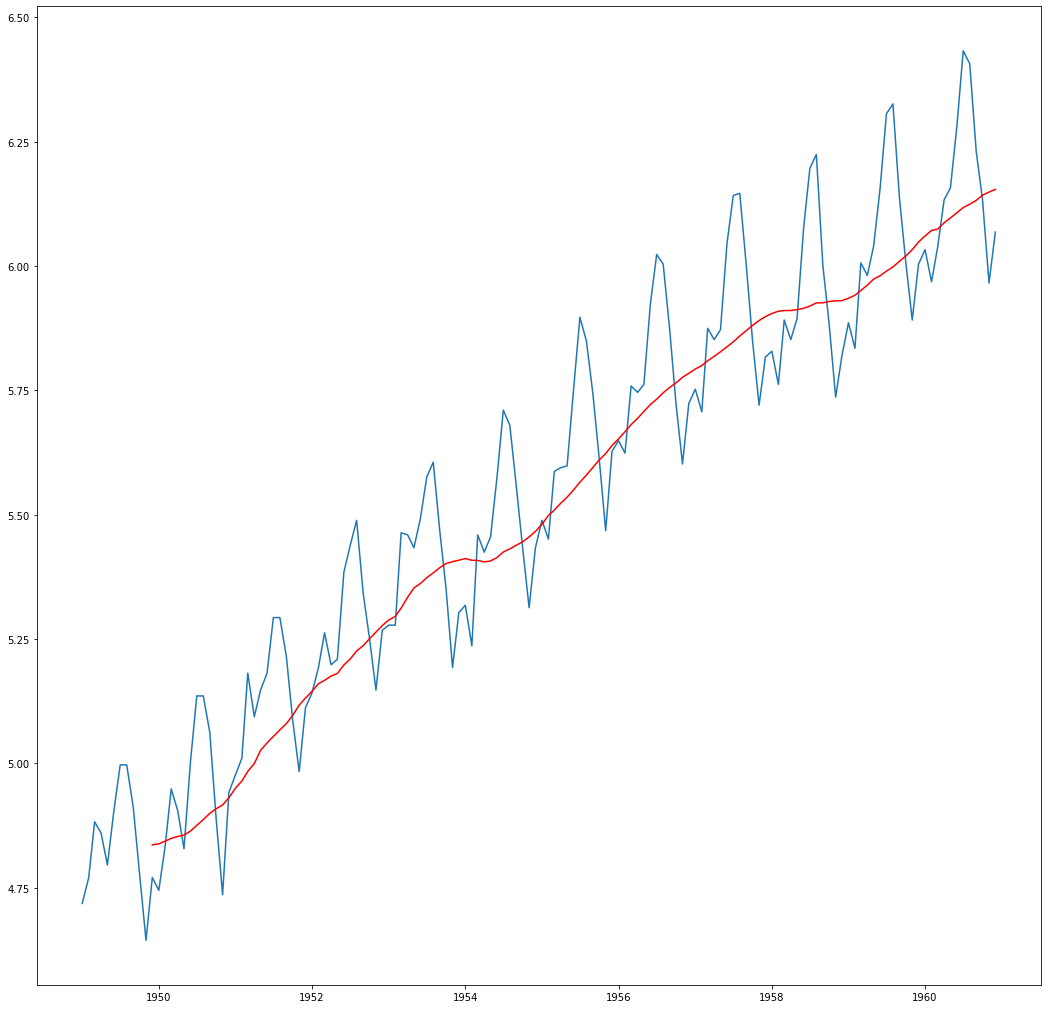

In [48]:
log_moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(log_moving_avg, c='red')
plt.show()

In [57]:
ts_log_moving_avg_diff = ts_log.passengers - log_moving_avg.passengers
print(ts_log_moving_avg_diff[0:14]) # first 11 contains NaN because window size=12
ts_log_moving_avg_diff = ts_log_moving_avg_diff[ts_log_moving_avg_diff.notnull()]

month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
Name: passengers, dtype: float64


In [61]:
from statsmodels.tsa.stattools import adfuller
dickey_fuller_test = adfuller(ts_log_moving_avg_diff)

In [62]:
print(dickey_fuller_test)
print("P-Value: %.3f"%dickey_fuller_test[1])

(-3.162907991300858, 0.022234630001243844, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747125)
P-Value: 0.022


In [63]:
ts_log_moving_avg_diff.head(12)

month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
Name: passengers, dtype: float64

In [69]:
def test_stationary(time_series):
    # Determining rolling statistics
    roll_mean = y.rolling(window=12).mean()
    roll_std = y.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(time_series, color="blue", label="Original")
    mean = plt.plot(roll_mean, color="red", label="Rolling Mean")
    std = plt.plot(roll_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()
    
    # Perform Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    dickey_fuller_test = adfuller(time_series)
    print("P-Value: %.3f"%dickey_fuller_test[1])

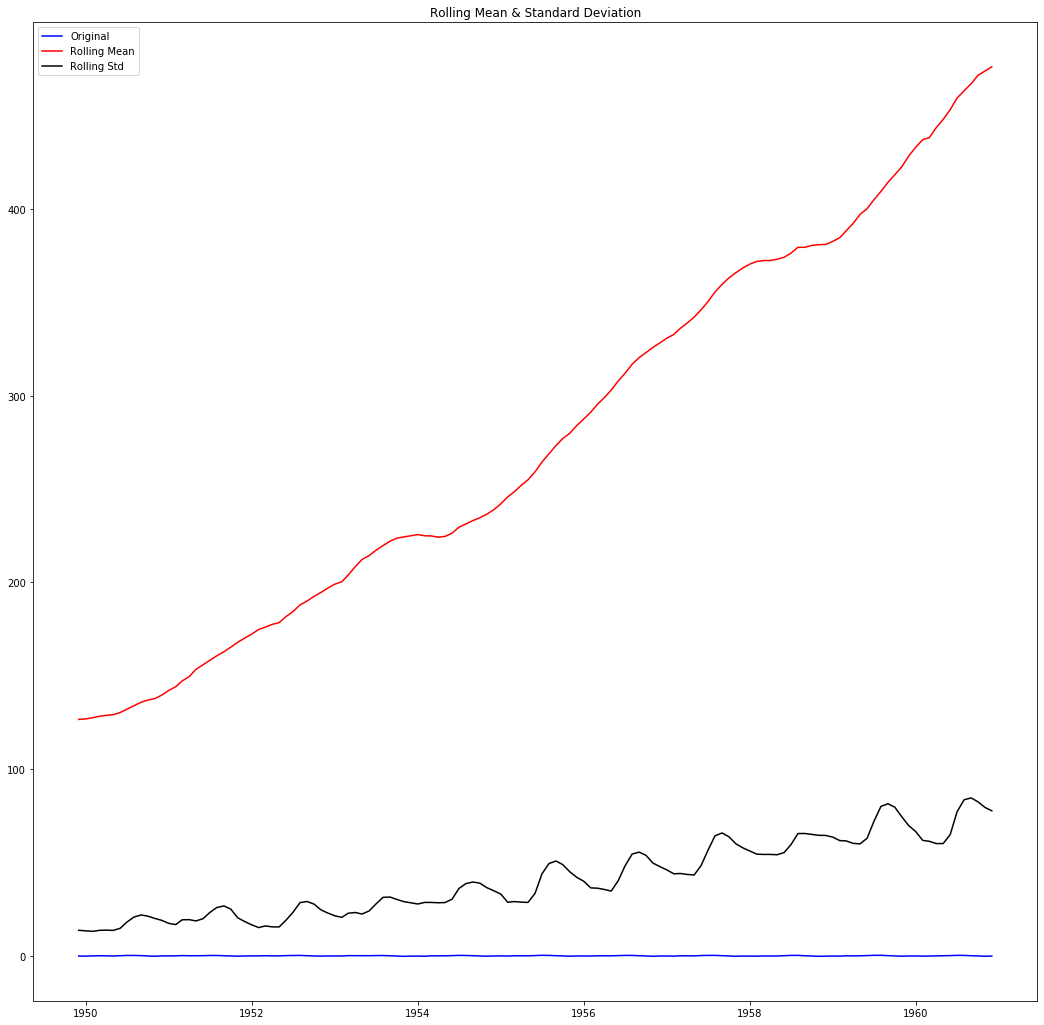

P-Value: 0.022


In [70]:
test_stationary(ts_log_moving_avg_diff)

In [76]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.shape

(133,)

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
# import statsmodels.api as sm
# sm.tsa.seasonal_decompose
decomposition = seasonal_decompose(ts_log_moving_avg_diff.dropna())

In [82]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# residual = decomposition.residual

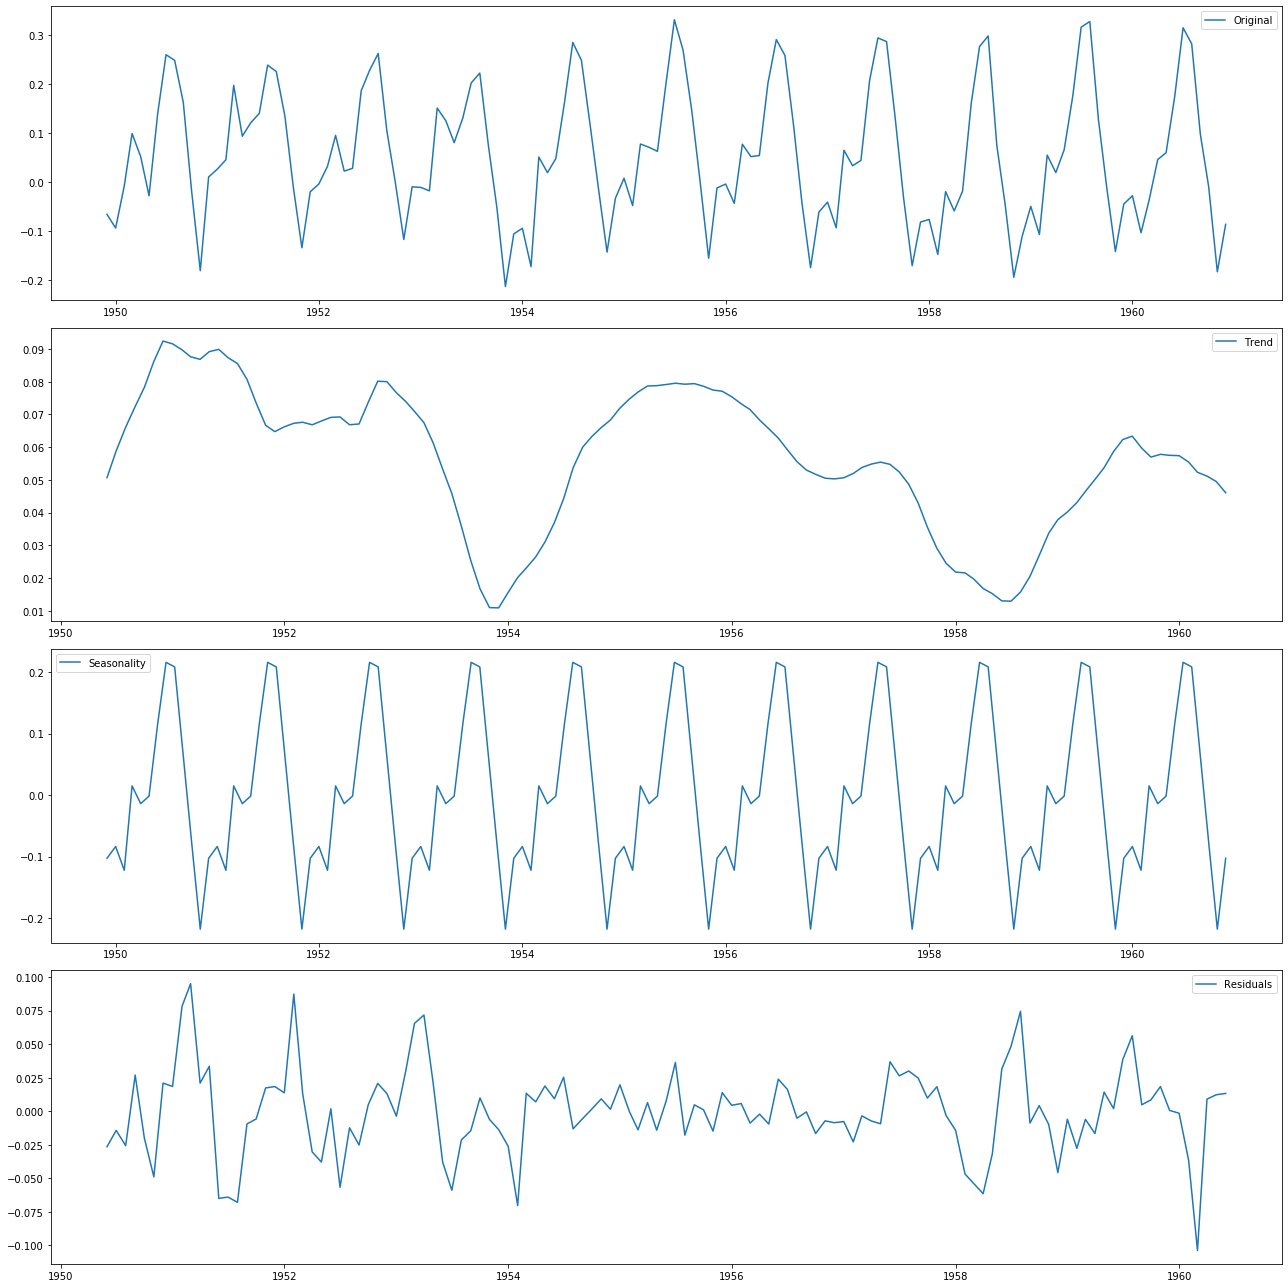

In [88]:
plt.subplot(411)
plt.plot(ts_log_moving_avg_diff, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

plt.tight_layout()

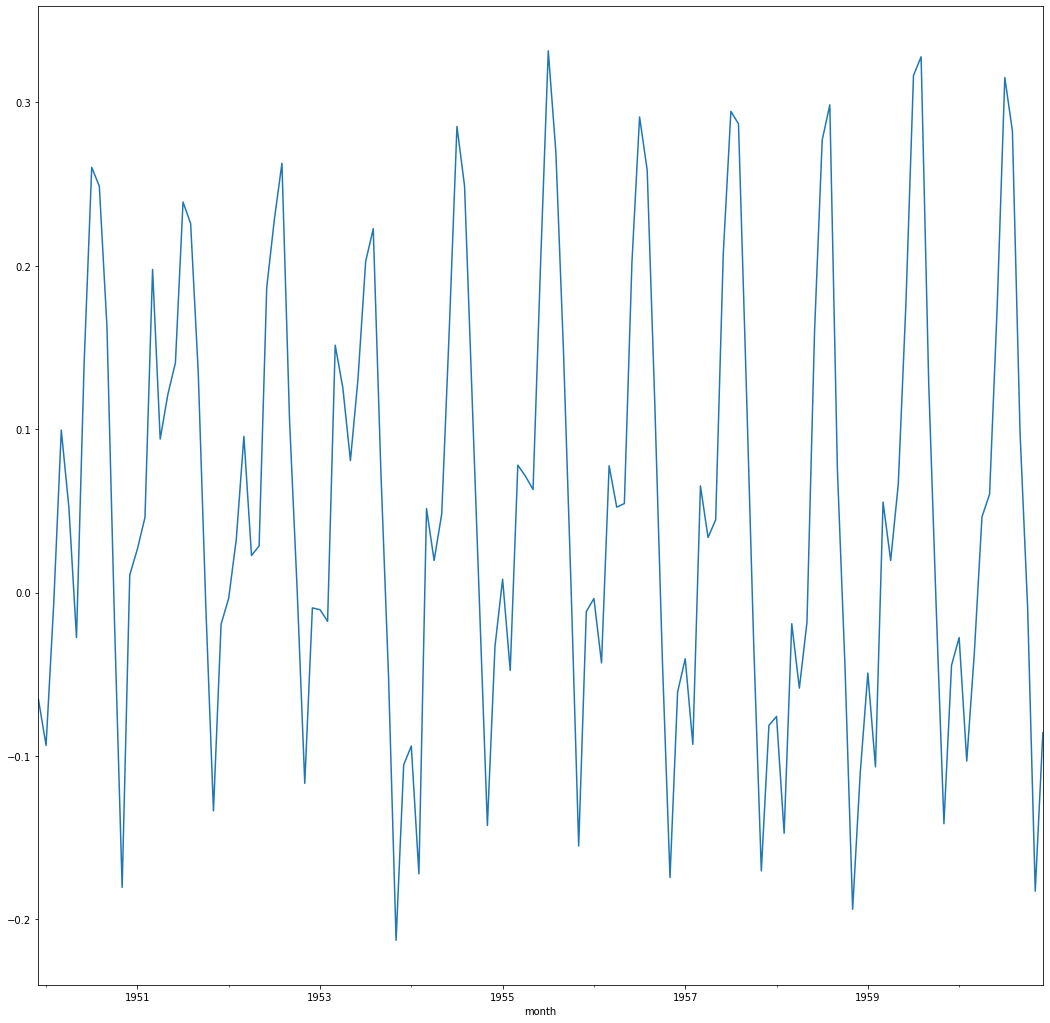

In [89]:
ts_log_moving_avg_diff.plot()

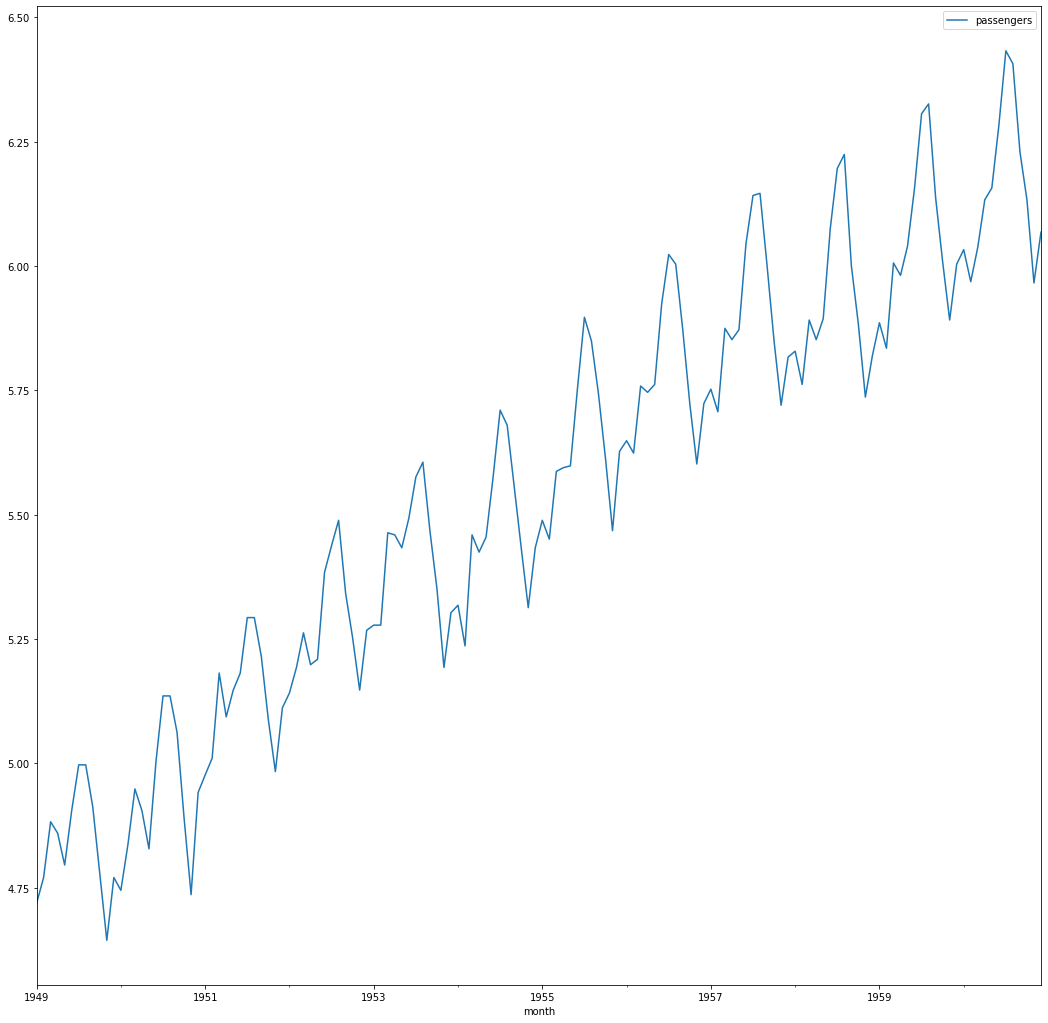

In [90]:
ts_log.plot()

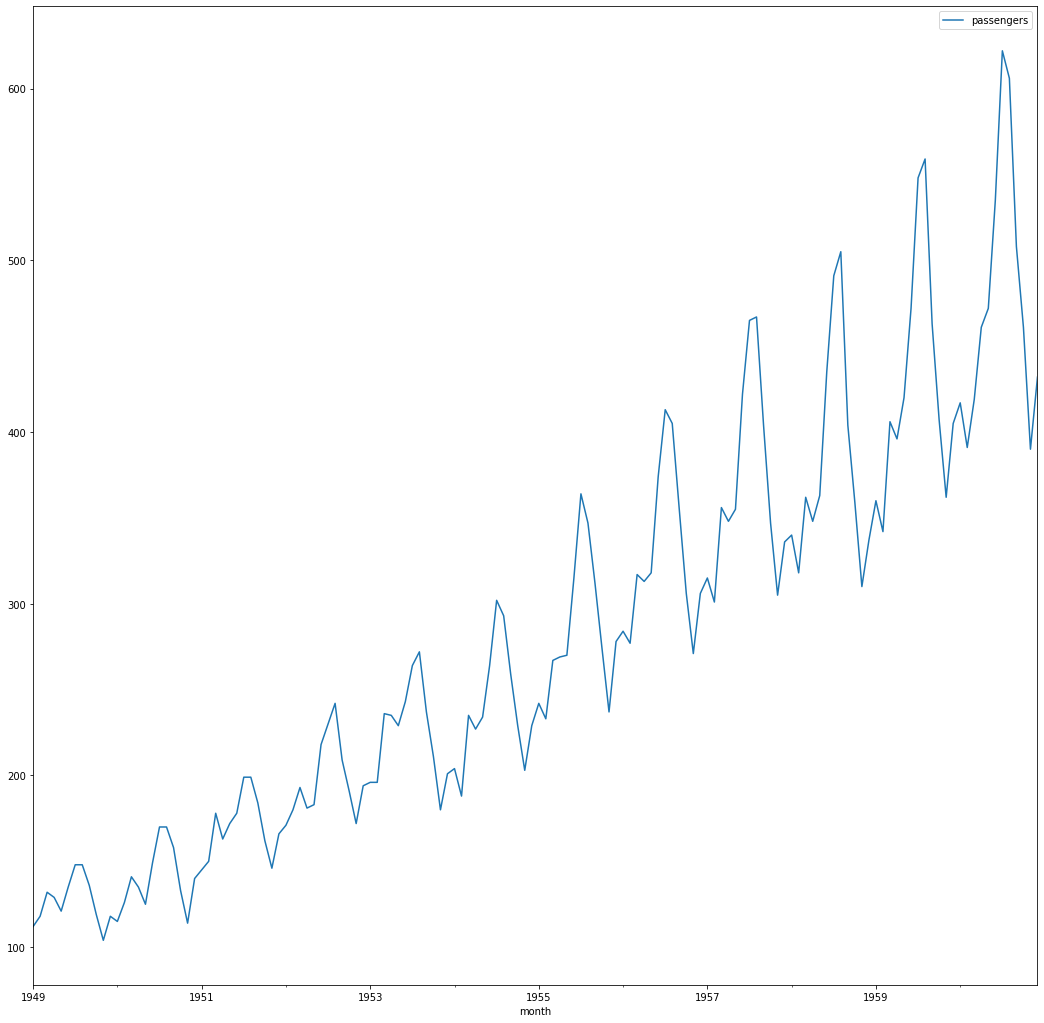

In [91]:
y.plot()

In [92]:
# Divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

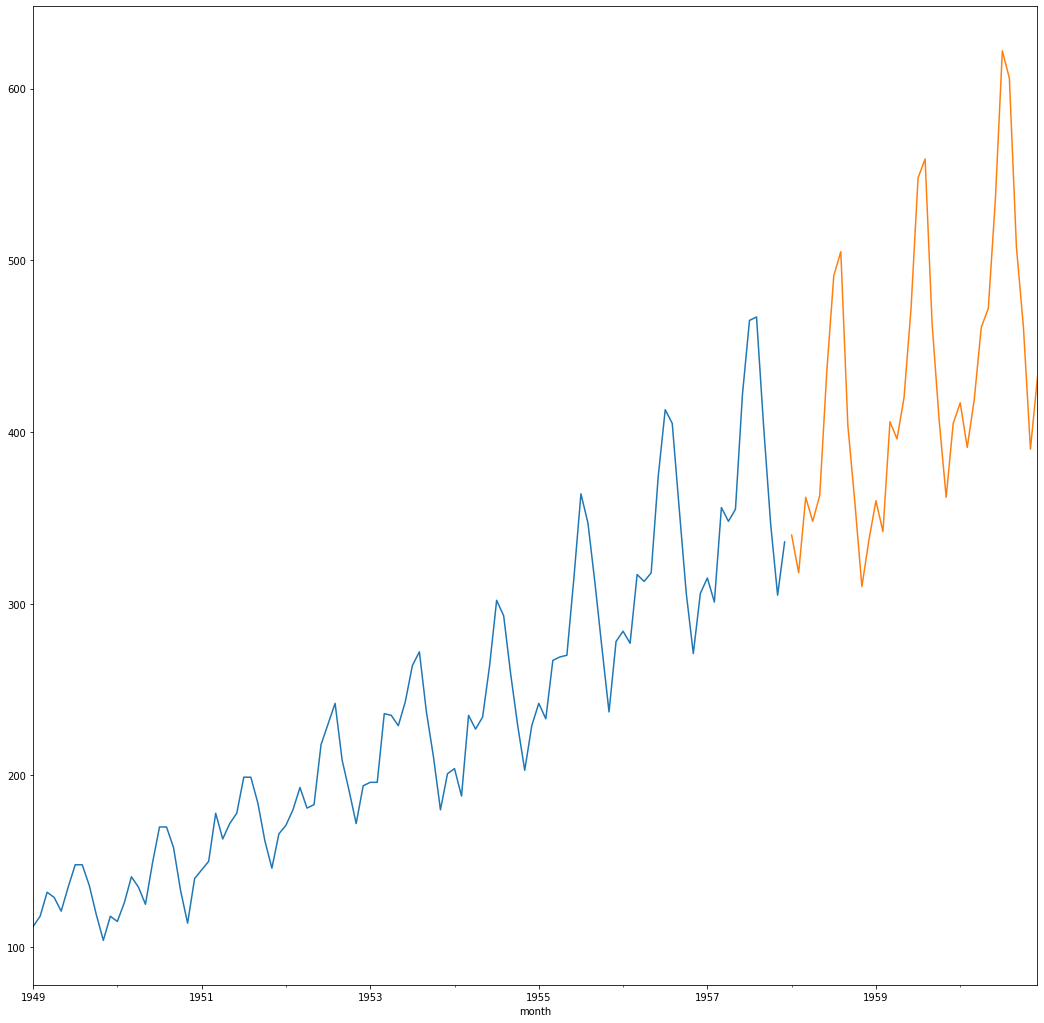

In [93]:
# Plotting the data
train.passengers.plot()
valid.passengers.plot()

In [96]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [97]:
# Fit Model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [98]:
start_index = valid.index.min()
end_index = valid.index.max()

In [100]:
pred = model_fit.predict(start=start_index, end=end_index)

In [101]:
pred

1958-01-01    8.743430
1958-02-01    7.109324
1958-03-01    5.898546
1958-04-01    5.001431
1958-05-01    4.336720
1958-06-01    3.844209
1958-07-01    3.479286
1958-08-01    3.208900
1958-09-01    3.008559
1958-10-01    2.860119
1958-11-01    2.750133
1958-12-01    2.668640
1959-01-01    2.608258
1959-02-01    2.563519
1959-03-01    2.530370
1959-04-01    2.505808
1959-05-01    2.487609
1959-06-01    2.474125
1959-07-01    2.464134
1959-08-01    2.456731
1959-09-01    2.451246
1959-10-01    2.447182
1959-11-01    2.444171
1959-12-01    2.441940
1960-01-01    2.440287
1960-02-01    2.439062
1960-03-01    2.438154
1960-04-01    2.437482
1960-05-01    2.436983
1960-06-01    2.436614
1960-07-01    2.436341
1960-08-01    2.436138
1960-09-01    2.435988
1960-10-01    2.435877
1960-11-01    2.435794
1960-12-01    2.435733
Freq: MS, dtype: float64

In [104]:
# Report Performance
# mse = mean_squared_error(valid, pred) # Same as below
mse = mean_squared_error(y[start_index: end_index], pred)
rmse = sqrt(mse)
print("RMSE: {}, MSE: {}".format(rmse, mse))

RMSE: 432.6263792322809, MSE: 187165.58400763333


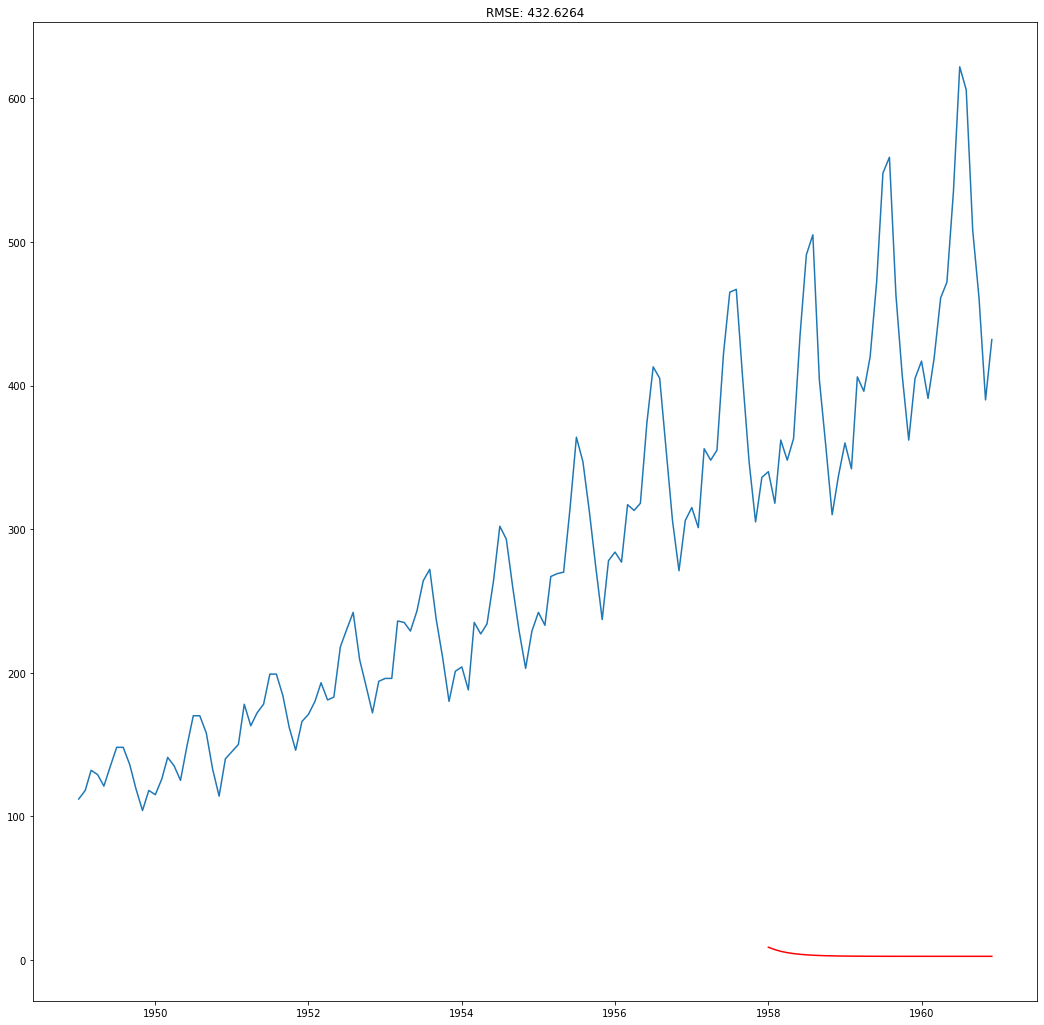

In [107]:
plt.plot(y.passengers)
plt.plot(pred, c="red")
plt.title("RMSE: %.4f"%rmse)
plt.show()